In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import matplotlib.ticker as ticker 
from matplotlib.axis import Axis 
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
# %matplotlib inline

import time
begin = time.time()

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [2]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [3]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data), data

(11163,
         temp
 0      13.19
 1      12.20
 2      12.29
 3      12.42
 4      14.54
 ...      ...
 11158  15.22
 11159  15.85
 11160  15.51
 11161  16.32
 11162  16.32
 
 [11163 rows x 1 columns])

In [4]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


<Axes: >

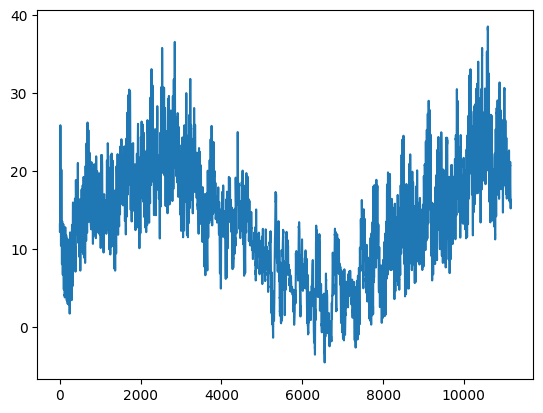

In [5]:
data['temp'].plot()

In [6]:
# convert string to datetime
date_time_str = '16/04/24 07:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')

then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 4, 16, 7, 0), datetime.datetime(2025, 7, 25, 10, 0))

In [7]:
len(data), date_time_str

(11163, '16/04/24 07:00:00')

In [8]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))


In [9]:
hours = mk_date(date_time_str,data)
#len(hours)
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [10]:
data

,temp,hours,dates
0,13.19,19829.291667,16/04/24 07:00:00
1,12.20,19829.333333,16/04/24 08:00:00
2,12.29,19829.375000,16/04/24 09:00:00
3,12.42,19829.416667,16/04/24 10:00:00
4,14.54,19829.458333,16/04/24 11:00:00
...,...,...,...
11158,15.22,20294.208333,25/07/25 05:00:00
11159,15.85,20294.250000,25/07/25 06:00:00
11160,15.51,20294.291667,25/07/25 07:00:00
11161,16.32,20294.333333,25/07/25 08:00:00


In [11]:
data[['dates','temp']]

,dates,temp
0,16/04/24 07:00:00,13.19
1,16/04/24 08:00:00,12.20
2,16/04/24 09:00:00,12.29
3,16/04/24 10:00:00,12.42
4,16/04/24 11:00:00,14.54
...,...,...
11158,25/07/25 05:00:00,15.22
11159,25/07/25 06:00:00,15.85
11160,25/07/25 07:00:00,15.51
11161,25/07/25 08:00:00,16.32


In [12]:
import warnings
warnings.filterwarnings("ignore")


In [13]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(        temp         hours              dates
 0      13.19  19829.291667  16/04/24 07:00:00
 1      12.20  19829.333333  16/04/24 08:00:00
 2      12.29  19829.375000  16/04/24 09:00:00
 3      12.42  19829.416667  16/04/24 10:00:00
 4      14.54  19829.458333  16/04/24 11:00:00
 ...      ...           ...                ...
 11158  15.22  20294.208333  25/07/25 05:00:00
 11159  15.85  20294.250000  25/07/25 06:00:00
 11160  15.51  20294.291667  25/07/25 07:00:00
 11161  16.32  20294.333333  25/07/25 08:00:00
 11162  16.32  20294.375000  25/07/25 09:00:00
 
 [11163 rows x 3 columns],
 11163)

In [14]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [15]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

np.float64(19.400000000000016)

In [16]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

11139

In [17]:
len(x)

11139

In [18]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

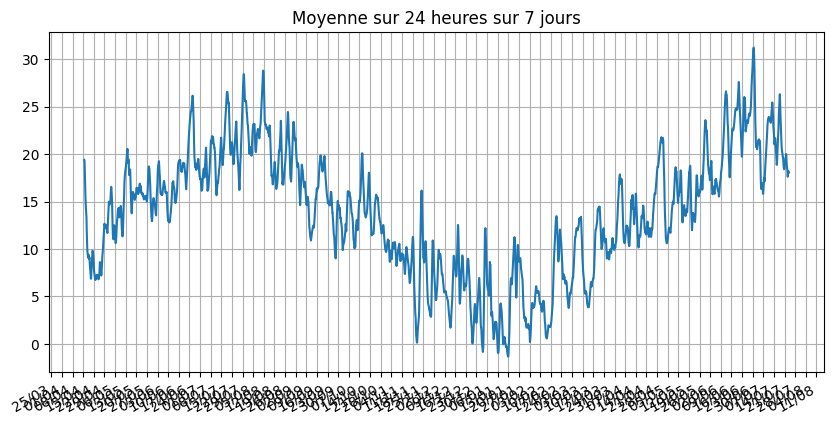

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) # jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [20]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=465, seconds=10531, microseconds=454799)

In [21]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [22]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 4, 16, 7, 0),
 datetime.datetime(2025, 7, 25, 9, 55, 31, 454799),
 465)

In [23]:
moyenne = data['temp'].mean()
moyenne

np.float64(13.792980381617866)

np.float64(13.792980381617866)

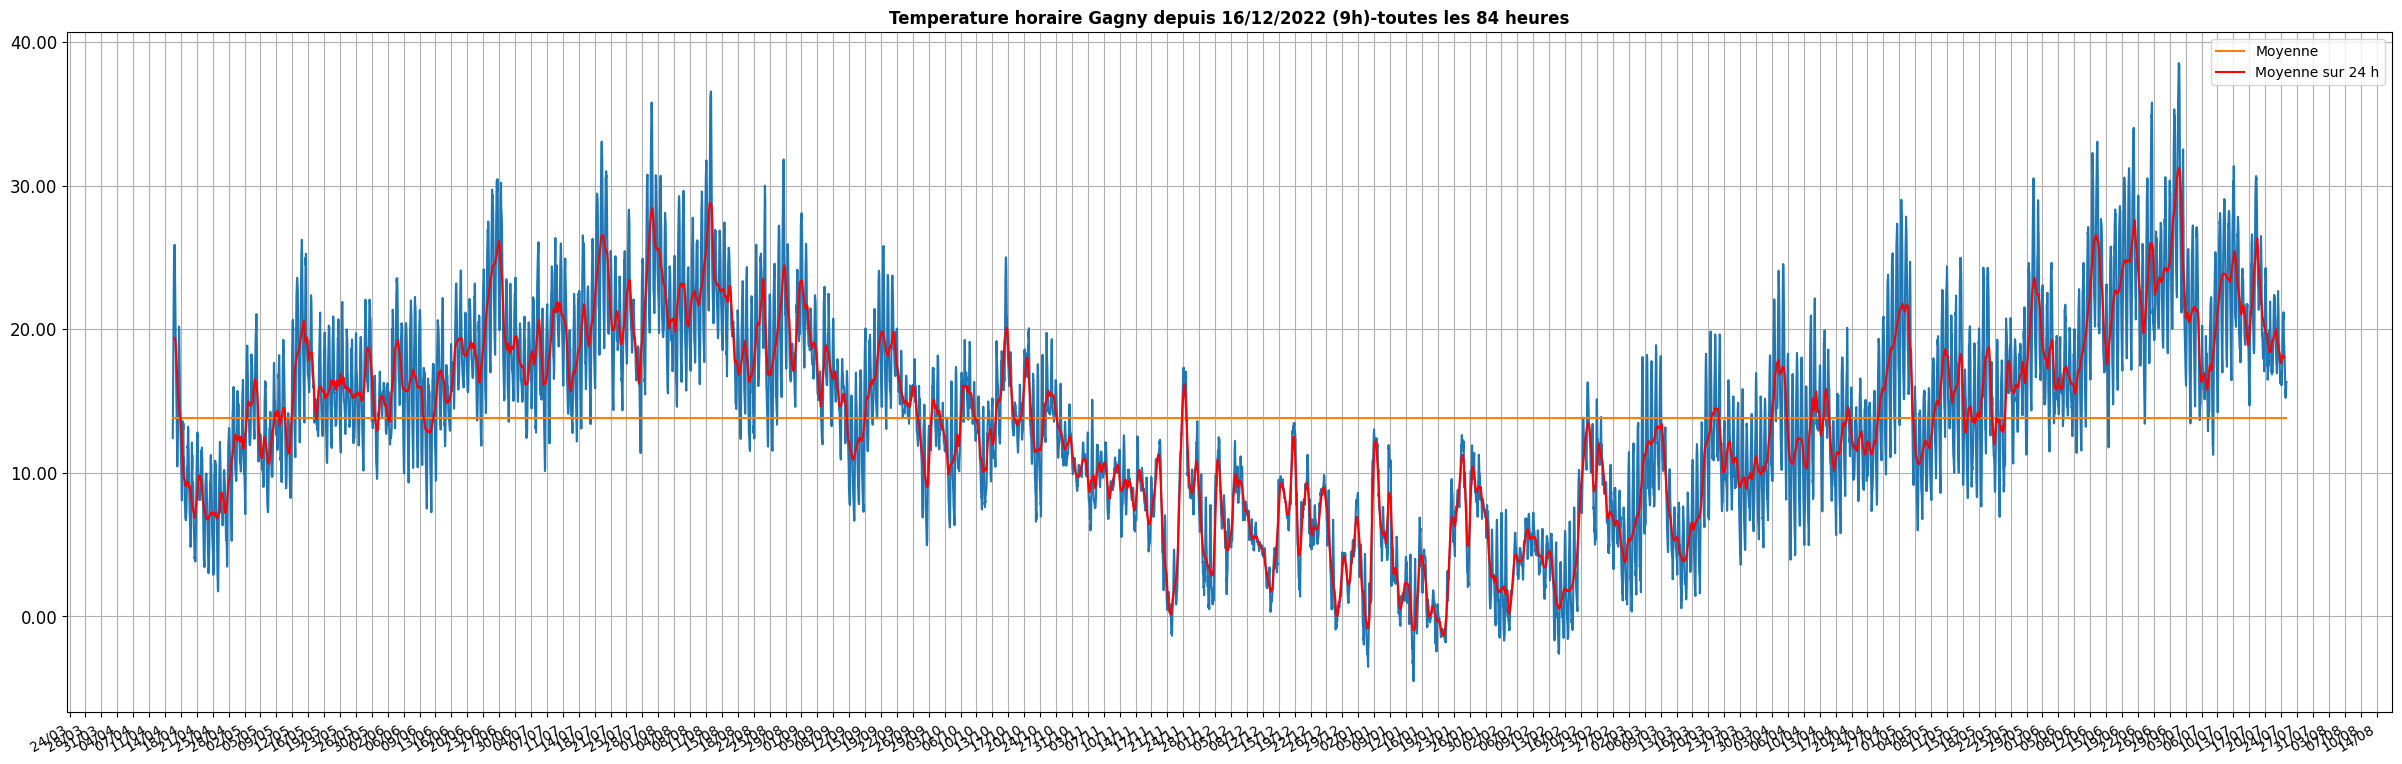

In [24]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [25]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
11158,15.22,20294.208333,25/07/25 05:00:00,-0.13
11159,15.85,20294.250000,25/07/25 06:00:00,0.63
11160,15.51,20294.291667,25/07/25 07:00:00,-0.34
11161,16.32,20294.333333,25/07/25 08:00:00,0.81


<Axes: >

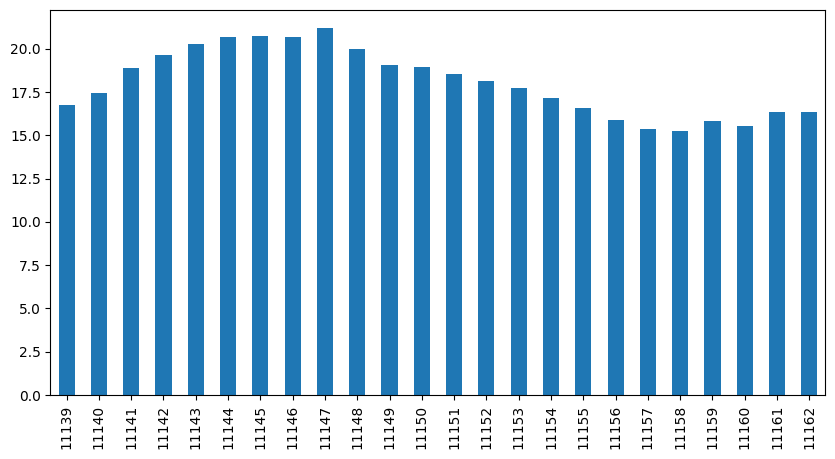

In [26]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

In [27]:
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
11158,15.22,20294.208333,25/07/25 05:00:00,-0.13
11159,15.85,20294.250000,25/07/25 06:00:00,0.63
11160,15.51,20294.291667,25/07/25 07:00:00,-0.34
11161,16.32,20294.333333,25/07/25 08:00:00,0.81


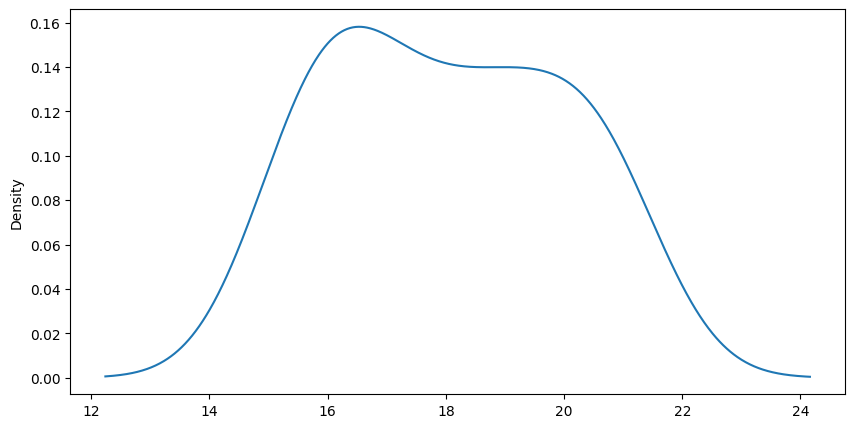

In [28]:
span = 24
try:
    data.tail(span)['temp'].plot.kde(figsize=(10,5))
    #data['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

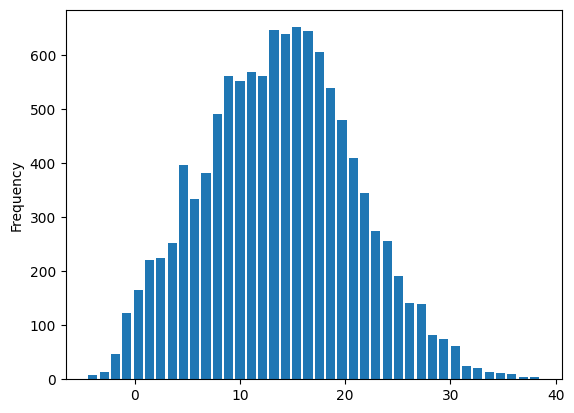

In [29]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

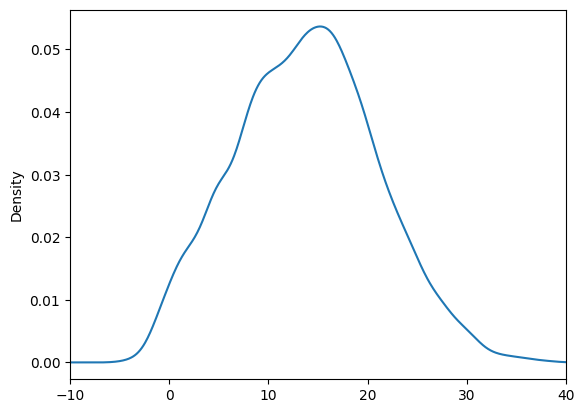

In [30]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

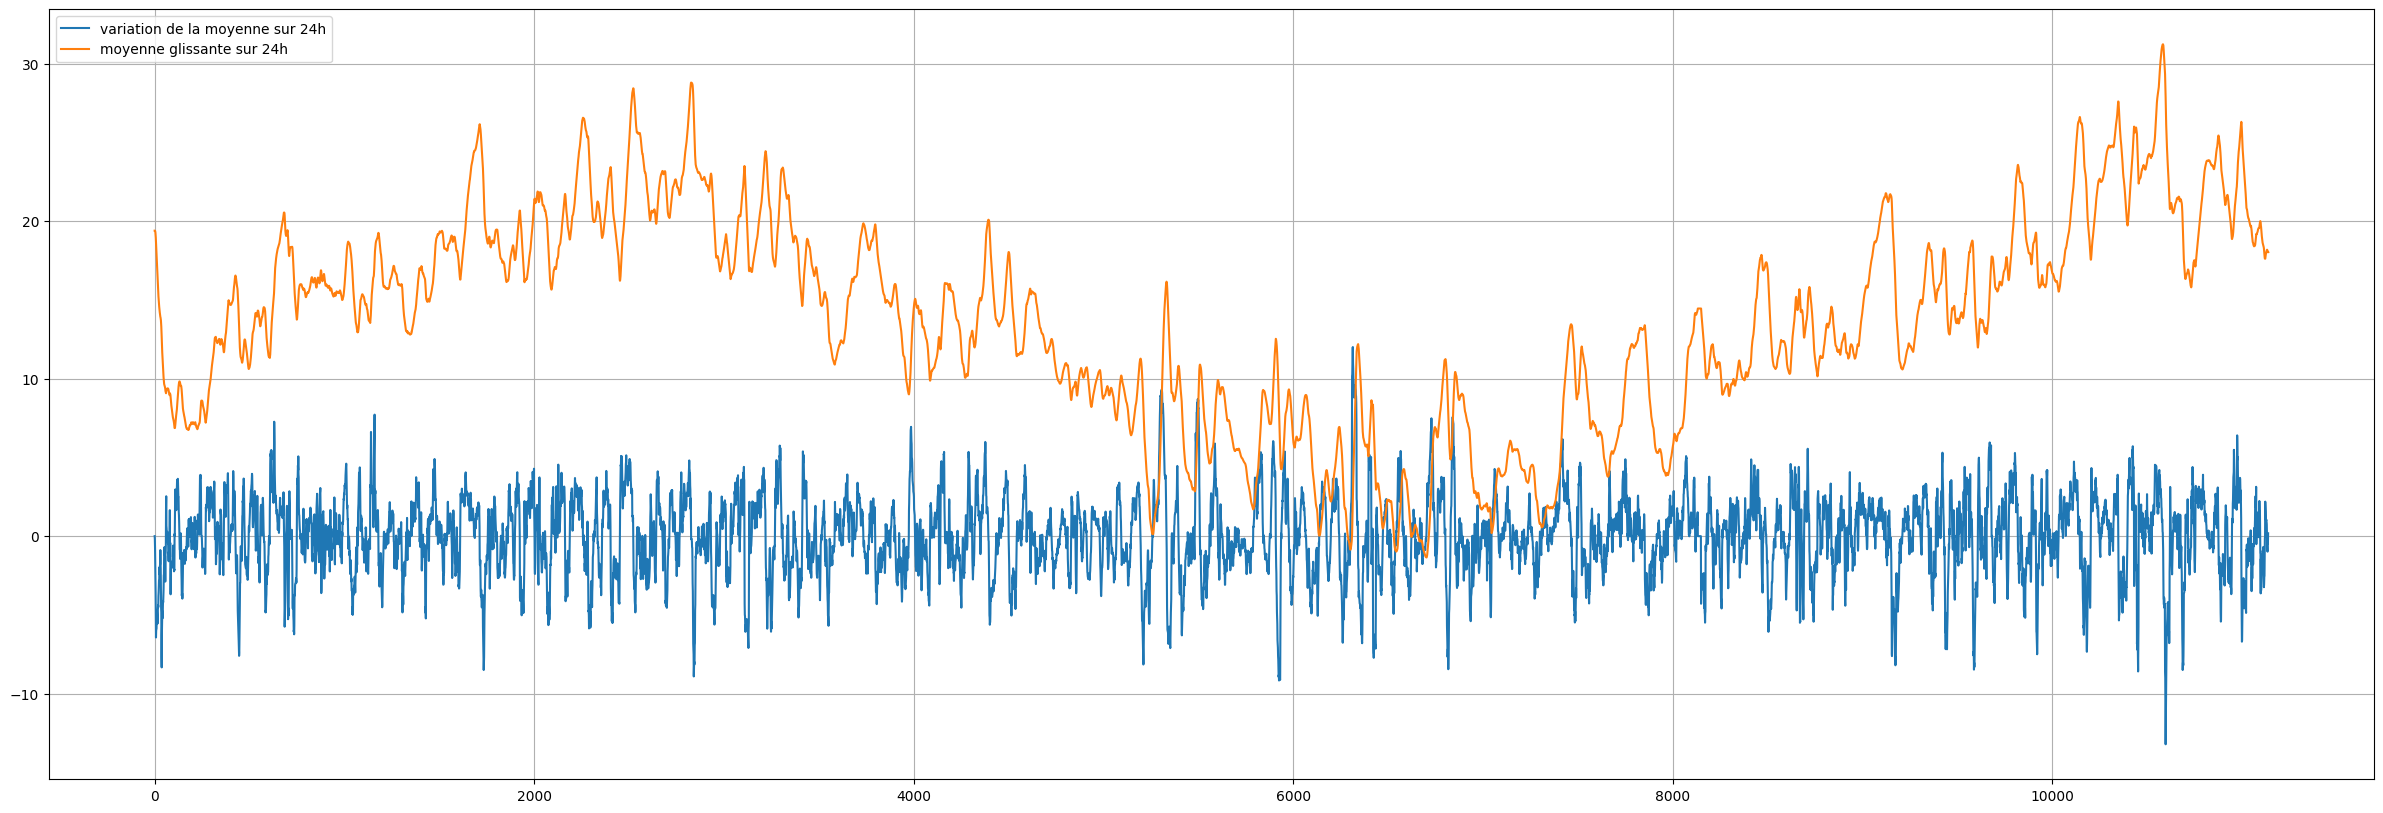

In [31]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [32]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [33]:
window, days, interval

(24, 15, 12)

In [34]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [35]:
h

10803    20279.416667
10804    20279.458333
10805    20279.500000
10806    20279.541667
10807    20279.583333
             ...     
11158    20294.208333
11159    20294.250000
11160    20294.291667
11161    20294.333333
11162    20294.375000
Name: hours, Length: 360, dtype: float64

In [36]:
datetime.now()

datetime.datetime(2025, 7, 25, 9, 55, 45, 429393)

In [37]:
window_start

'10/07/2025, 09:55:45'

In [38]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

np.float64(21.5337777777778)

In [39]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, np.float64(21.5337777777778))

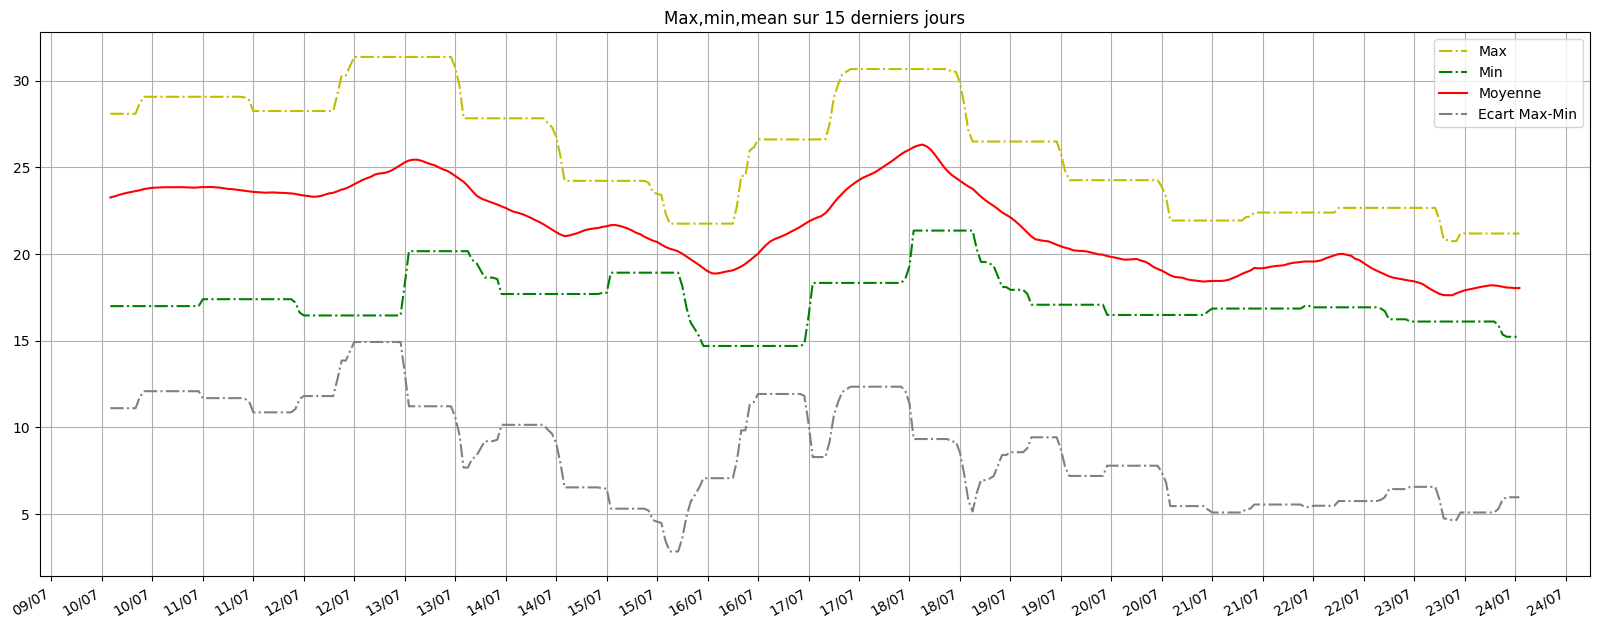

In [40]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [41]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

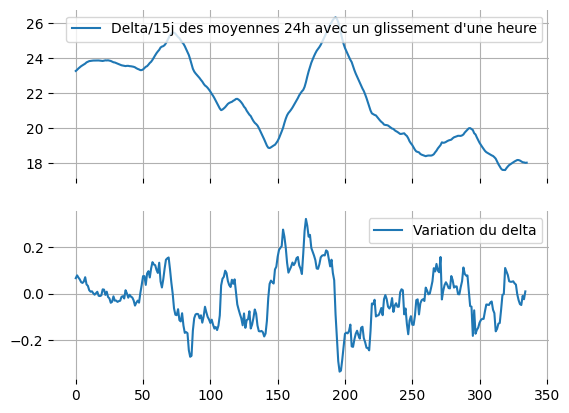

In [42]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [43]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [44]:
# graphical output...
from pylab import sign, diff # type: ignore


In [45]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


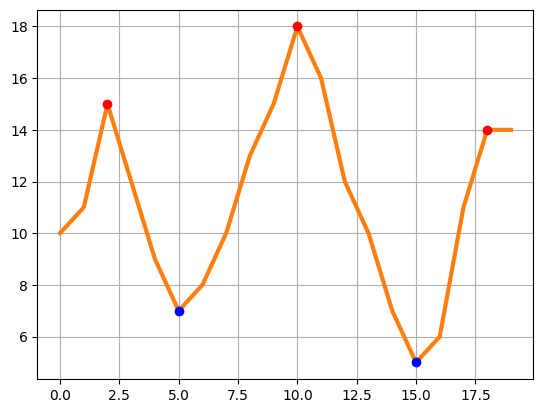

In [46]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [47]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
10995,18/07/25,10,22.96,1.54
10996,18/07/25,11,25.44,2.48
10997,18/07/25,12,27.49,2.05
10998,18/07/25,13,28.99,1.50
10999,18/07/25,14,29.77,0.78
...,...,...,...,...
11158,25/07/25,05,15.22,-0.13
11159,25/07/25,06,15.85,0.63
11160,25/07/25,07,15.51,-0.34
11161,25/07/25,08,16.32,0.81


In [48]:
_min_ = round(data.tail(24*jours).temp.min(),2)
_max_ = round(data.tail(24*jours).temp.max(),2)

In [49]:
_max_ - _min_

np.float64(15.450000000000001)

In [50]:
window_start

'10/07/2025, 09:55:45'

## Main graph

(np.float64(21.5337777777778), 15)

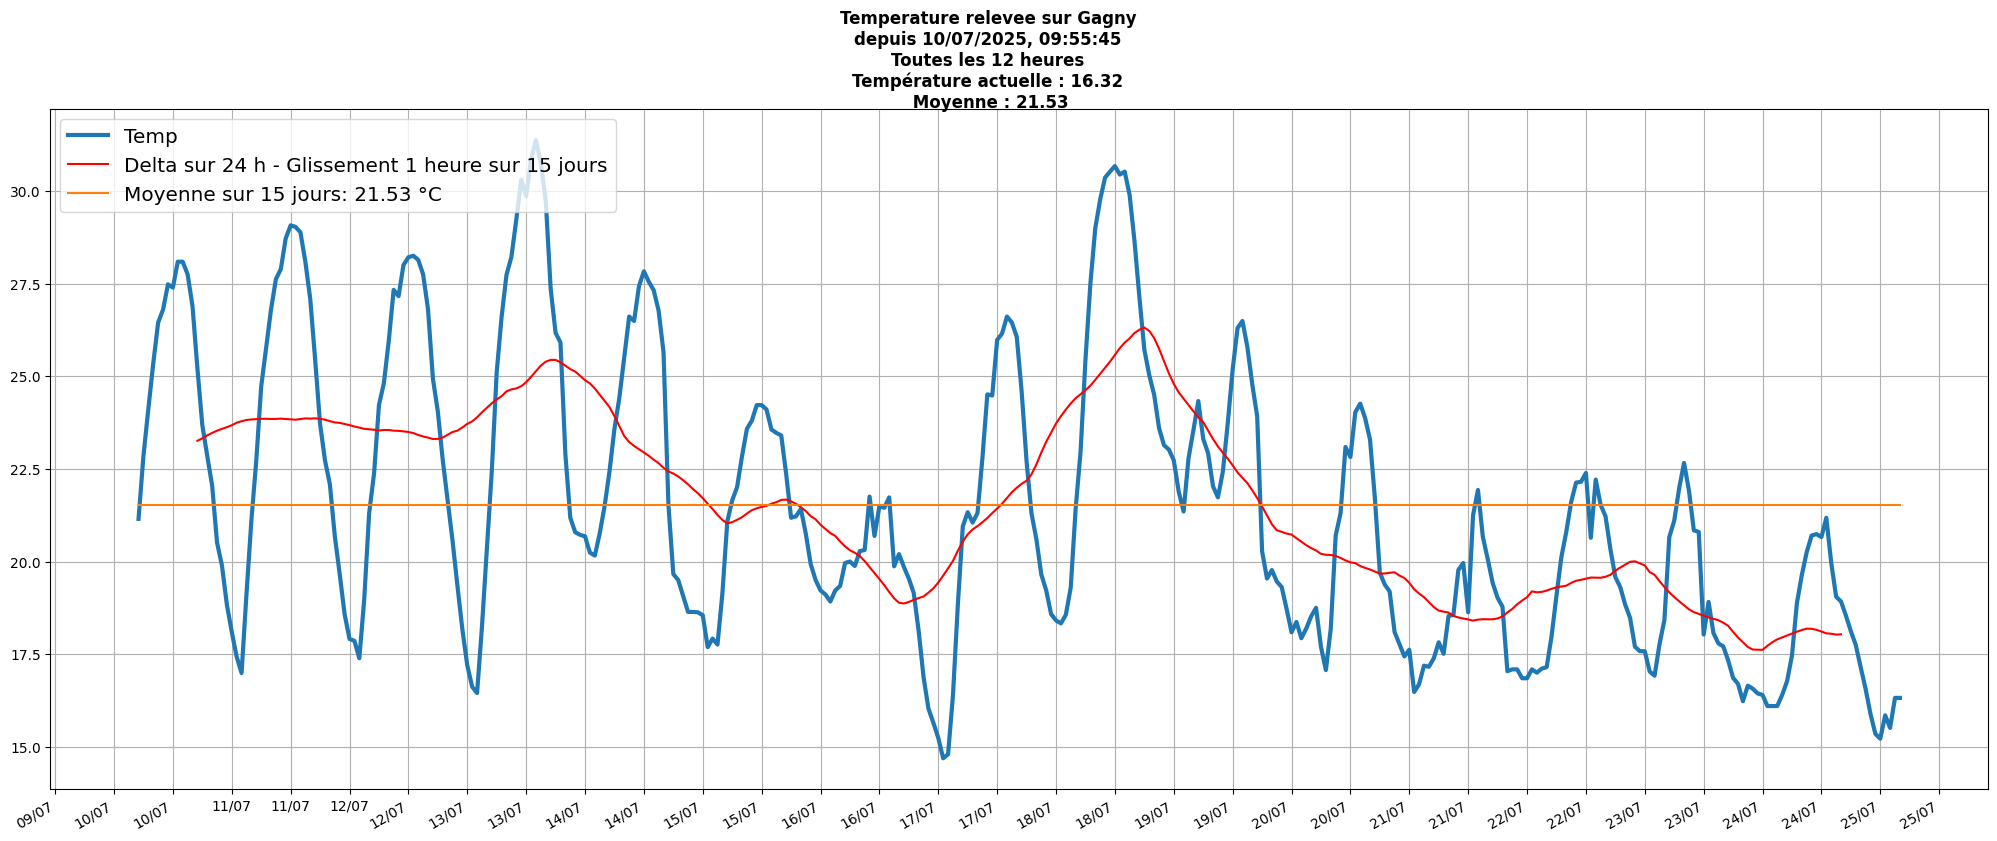

In [51]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [52]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
11158,05,15.22,-0.13
11159,06,15.85,0.63
11160,07,15.51,-0.34
11161,08,16.32,0.81
11162,09,16.32,0.00


In [53]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

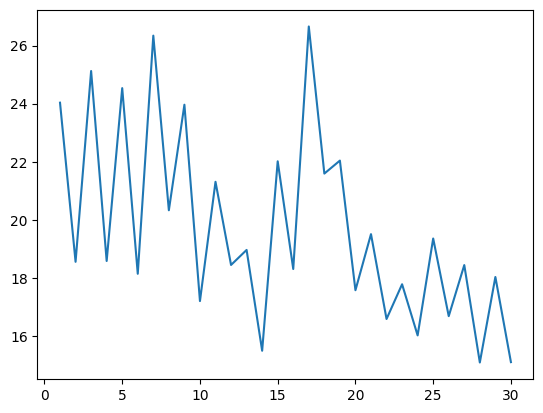

In [54]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

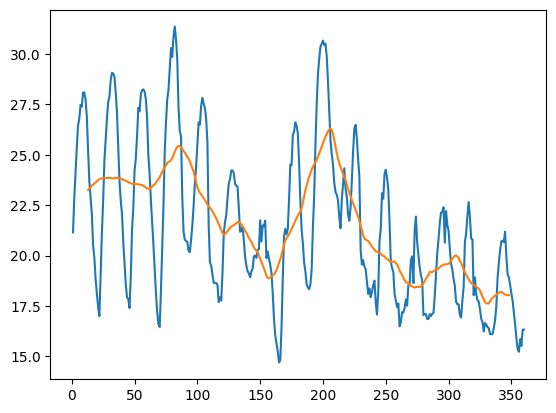

In [55]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x1d175a4b110>])

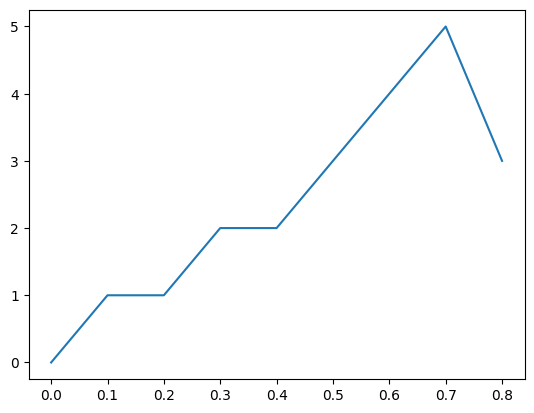

In [56]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x1d1763f8190>])

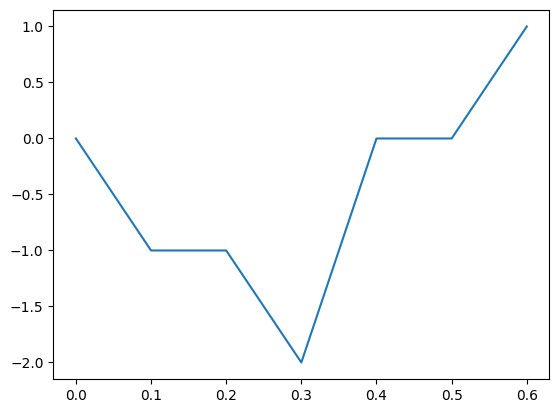

In [57]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

In [58]:
n = data.tail(1)['dates'].values[0]
n, type(n)

('25/07/25 09:00:00', str)

In [59]:
def days_hours_minutes(td):
    return td.days, td.seconds//3600, (td.seconds//60)%60

In [60]:
savefig = False
ref = '22/07/25 07:00:00'
datetime_object = datetime.strptime(ref, '%d/%m/%y %H:%M:%S')
datetime_object

datetime.datetime(2025, 7, 22, 7, 0)

In [61]:
def get_next_save_date(ref_date, current_date=None):
    """
    Calculate the next save date (every 7 days from reference date).
    
    Args:
        ref_date (datetime): The reference start date
        current_date (datetime, optional): Date to check from. Defaults to now.
    
    Returns:
        datetime: Next save date
    """
    if current_date is None:
        current_date = datetime.now()
    
    delta = current_date - ref_date
    days_since_last_save = delta.days % 7
    print(days_since_last_save)
    if days_since_last_save == 0:
        savefig = True
        return current_date
    else:
        return current_date + dt.timedelta(days=(7 - days_since_last_save))


In [62]:
# Example usage
next_save = get_next_save_date(datetime_object)
print(savefig)
print(f"Next save will be on: {next_save.strftime('%d/%m/%y')}")
td = datetime.now() - datetime_object
if savefig:
#if td.days % 7 == 0 and td.days >= 0 :
    print("Save figure")
    datetime_object = datetime.now()
    fig_filename = datetime_object.strftime('%Y%m%d') + '_7daystemp.png'
    #savefig = True
else:
    print("No saving today")

3
False
Next save will be on: 29/07/25
No saving today


In [63]:
ref, td, td.days, days_hours_minutes(td)

('22/07/25 07:00:00',
 datetime.timedelta(days=3, seconds=10550, microseconds=522730),
 3,
 (3, 2, 55))

In [64]:
end = time.time()
print(end - begin)

25.28761887550354


# Température depuis 7 jours par heure

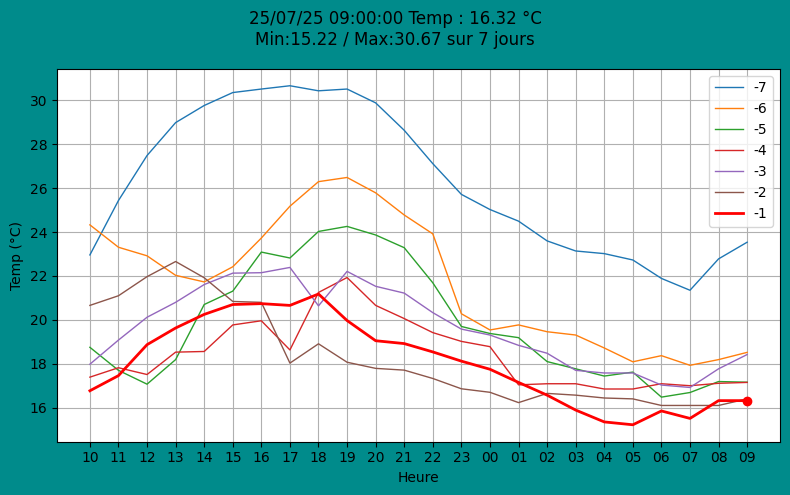

In [65]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(figsize=(8, 5),facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"{n} Temp : {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min_} / Max:{_max_} sur {jours} jours")
plt.xlabel(f"Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()
if savefig:
    plt.savefig(fig_filename)
    print('Fig saved')
plt.tight_layout()
plt.show()

In [66]:
t=7
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))
print(max_,min_)

30.670000000000016 21.350000000000023


In [67]:
df_jours=data.tail(24*7)
df

[0, -1, -1, -2, 0, 0, 1]

In [68]:
df_jours.groupby('jours')['temp'].mean()

jours
18/07/25    28.466429
19/07/25    23.532917
20/07/25    20.182083
21/07/25    18.647083
22/07/25    19.325833
23/07/25    18.928333
24/07/25    18.106250
25/07/25    16.193000
Name: temp, dtype: float64

<Axes: xlabel='jours'>

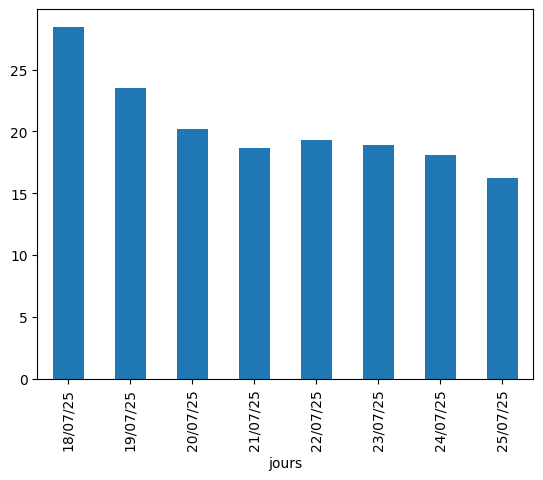

In [69]:
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')

In [70]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [71]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# how to label on top of a bar plot

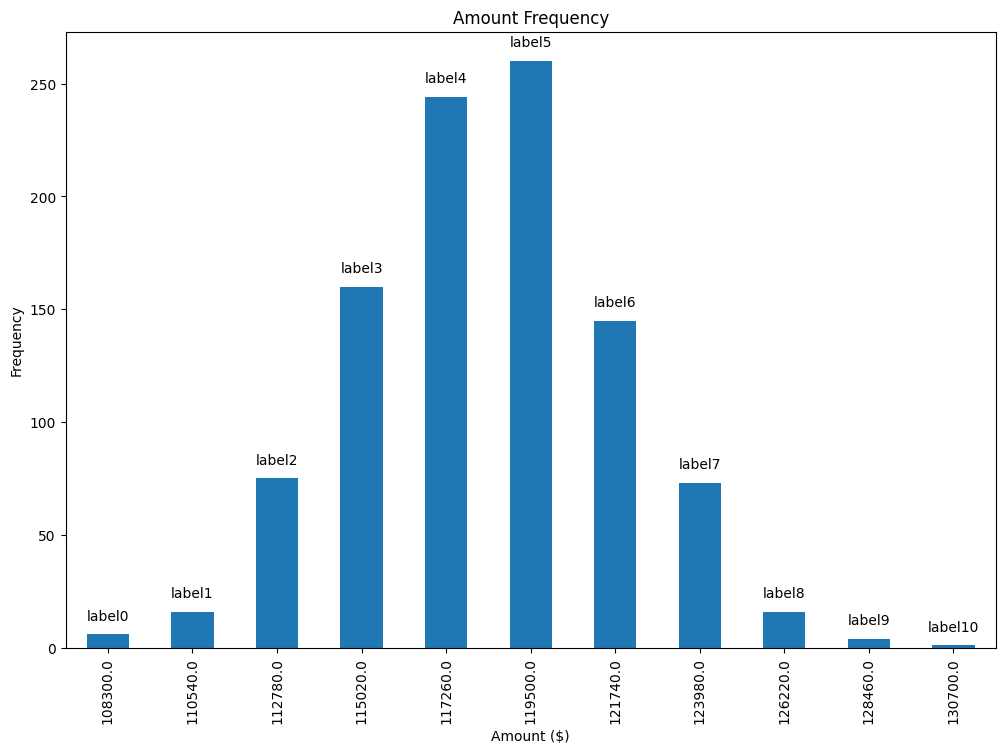

In [72]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [73]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25,
 [np.float64(26.06),
  np.float64(21.79),
  np.float64(19.68),
  np.float64(18.39),
  np.float64(19.54),
  np.float64(18.27),
  np.float64(17.97)])

In [74]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19829.291667,16/04/24 07:00:00,NaN,07,16/04/24
1,12.20,19829.333333,16/04/24 08:00:00,-0.99,08,16/04/24
2,12.29,19829.375000,16/04/24 09:00:00,0.09,09,16/04/24
3,12.42,19829.416667,16/04/24 10:00:00,0.13,10,16/04/24
4,14.54,19829.458333,16/04/24 11:00:00,2.12,11,16/04/24
...,...,...,...,...,...,...
11158,15.22,20294.208333,25/07/25 05:00:00,-0.13,05,25/07/25
11159,15.85,20294.250000,25/07/25 06:00:00,0.63,06,25/07/25
11160,15.51,20294.291667,25/07/25 07:00:00,-0.34,07,25/07/25
11161,16.32,20294.333333,25/07/25 08:00:00,0.81,08,25/07/25


In [75]:
areas


[26.21, 21.82, 19.76, 18.44, 19.62, 18.31, 18.03]

[Text(-8.0, 0, '-7'),
 Text(-7.0, 0, '-6'),
 Text(-6.0, 0, '-5'),
 Text(-5.0, 0, '-4'),
 Text(-4.0, 0, '-3'),
 Text(-3.0, 0, '-2'),
 Text(-2.0, 0, '-1'),
 Text(-1.0, 0, ''),
 Text(0.0, 0, '')]

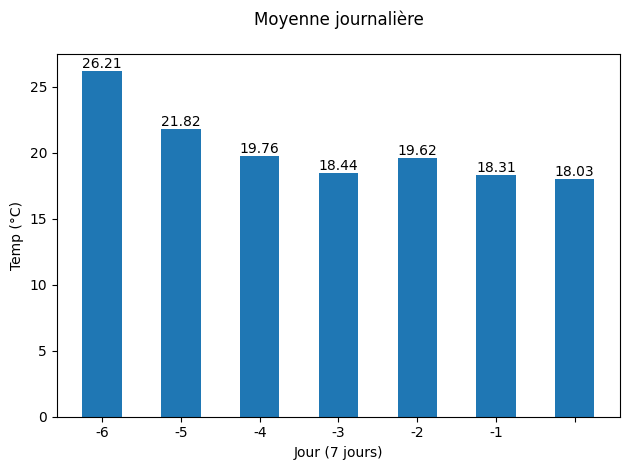

In [76]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )
ax.set_xticklabels(X_axis)


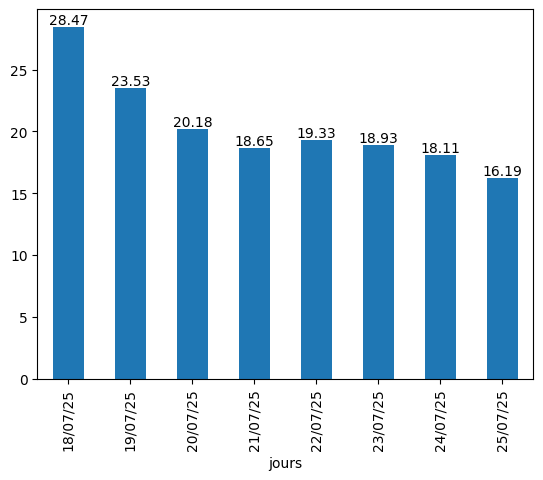

In [77]:
fig, ax = plt.subplots()
df_jours.groupby('jours')['temp'].mean().plot(kind='bar')
rects = ax.patches

# Make some labels.
labels = [round(rects[i].get_height(),2) for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )


In [78]:
labels

[np.float64(28.47),
 np.float64(23.53),
 np.float64(20.18),
 np.float64(18.65),
 np.float64(19.33),
 np.float64(18.93),
 np.float64(18.11),
 np.float64(16.19)]

In [79]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([16.77000000000004,
  17.460000000000036,
  18.870000000000005,
  19.629999999999995,
  20.25,
  20.700000000000045,
  20.74000000000001,
  20.660000000000025,
  21.180000000000007,
  19.970000000000027,
  19.05000000000001,
  18.920000000000016,
  18.54000000000002,
  18.120000000000005,
  17.75,
  17.150000000000034,
  16.57000000000005,
  15.890000000000043,
  15.350000000000025,
  15.220000000000027,
  15.850000000000025,
  15.510000000000048,
  16.32000000000005,
  16.32000000000005],
 416.2450000000006)

In [80]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

416.2450000000006

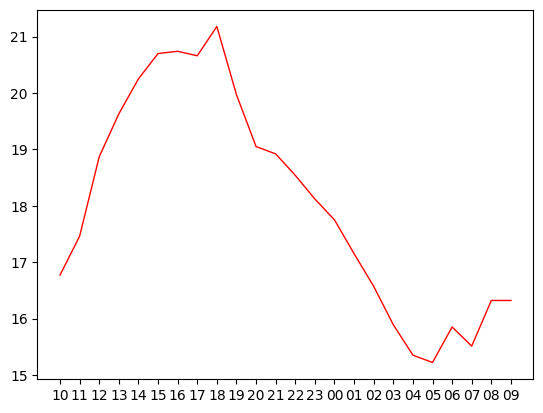

In [81]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [82]:
data.tail()


,temp,hours,dates,variation,heures,jours
11158,15.22,20294.208333,25/07/25 05:00:00,-0.13,05,25/07/25
11159,15.85,20294.250000,25/07/25 06:00:00,0.63,06,25/07/25
11160,15.51,20294.291667,25/07/25 07:00:00,-0.34,07,25/07/25
11161,16.32,20294.333333,25/07/25 08:00:00,0.81,08,25/07/25
11162,16.32,20294.375000,25/07/25 09:00:00,0.00,09,25/07/25


In [83]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([20.74000000000001,
  21.180000000000007,
  15.850000000000025,
  16.32000000000005],
 [16.77000000000004,
  20.660000000000025,
  15.220000000000027,
  15.510000000000048],
 4,
 4)

In [84]:
_diff=[M-m for M,m in zip(_max, _min)]

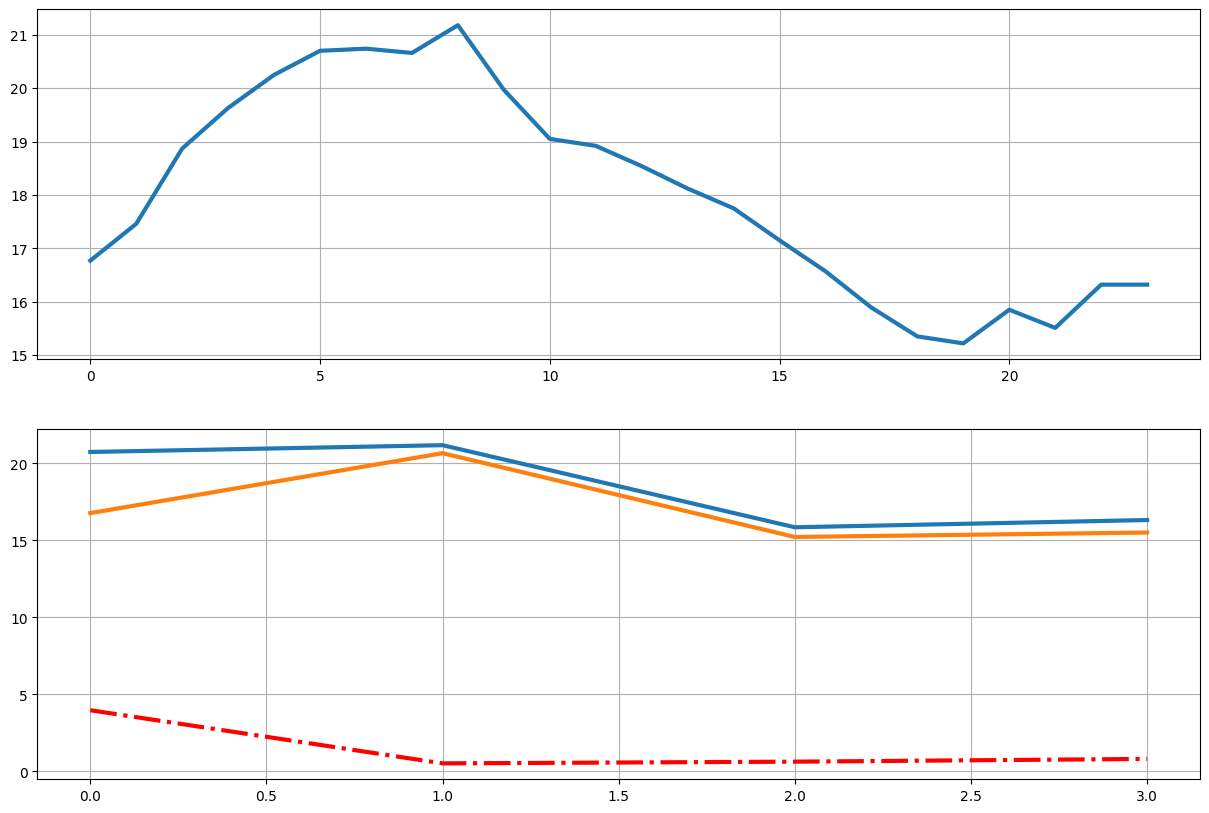

In [85]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[2] 1 [1] 1
[2] 1 [1] 1


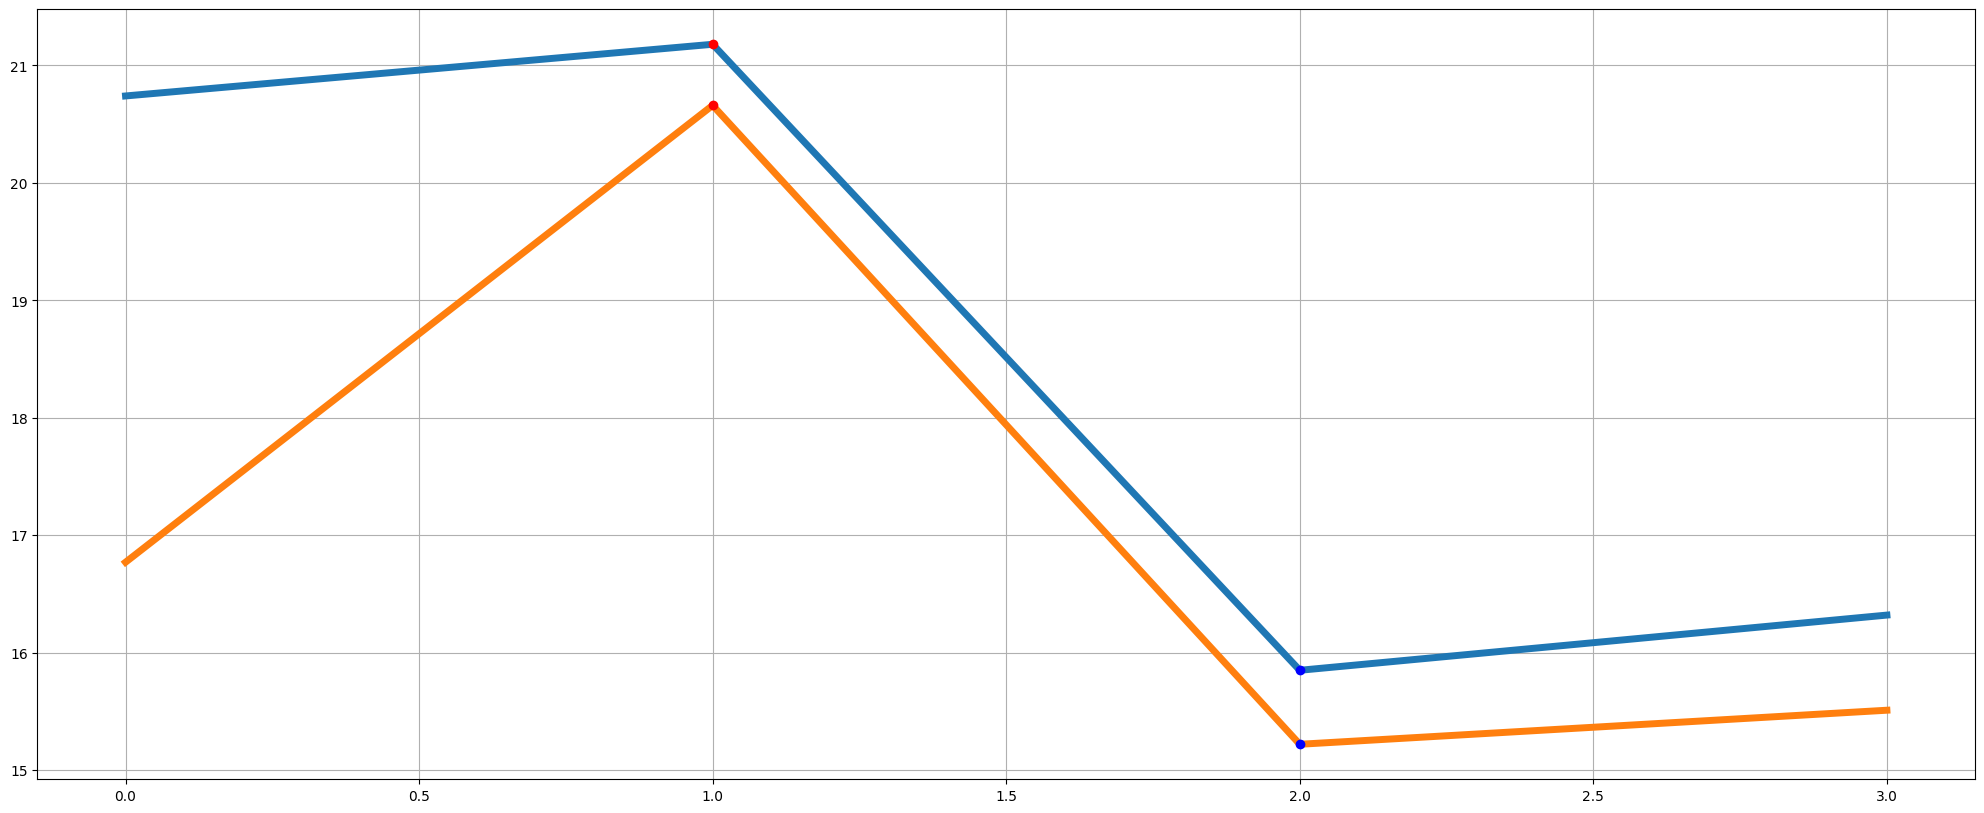

In [86]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [87]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [88]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [89]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [90]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [91]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17]),)

# maximas, minimas

[ 5 15] 2 [ 2 10 18] 3


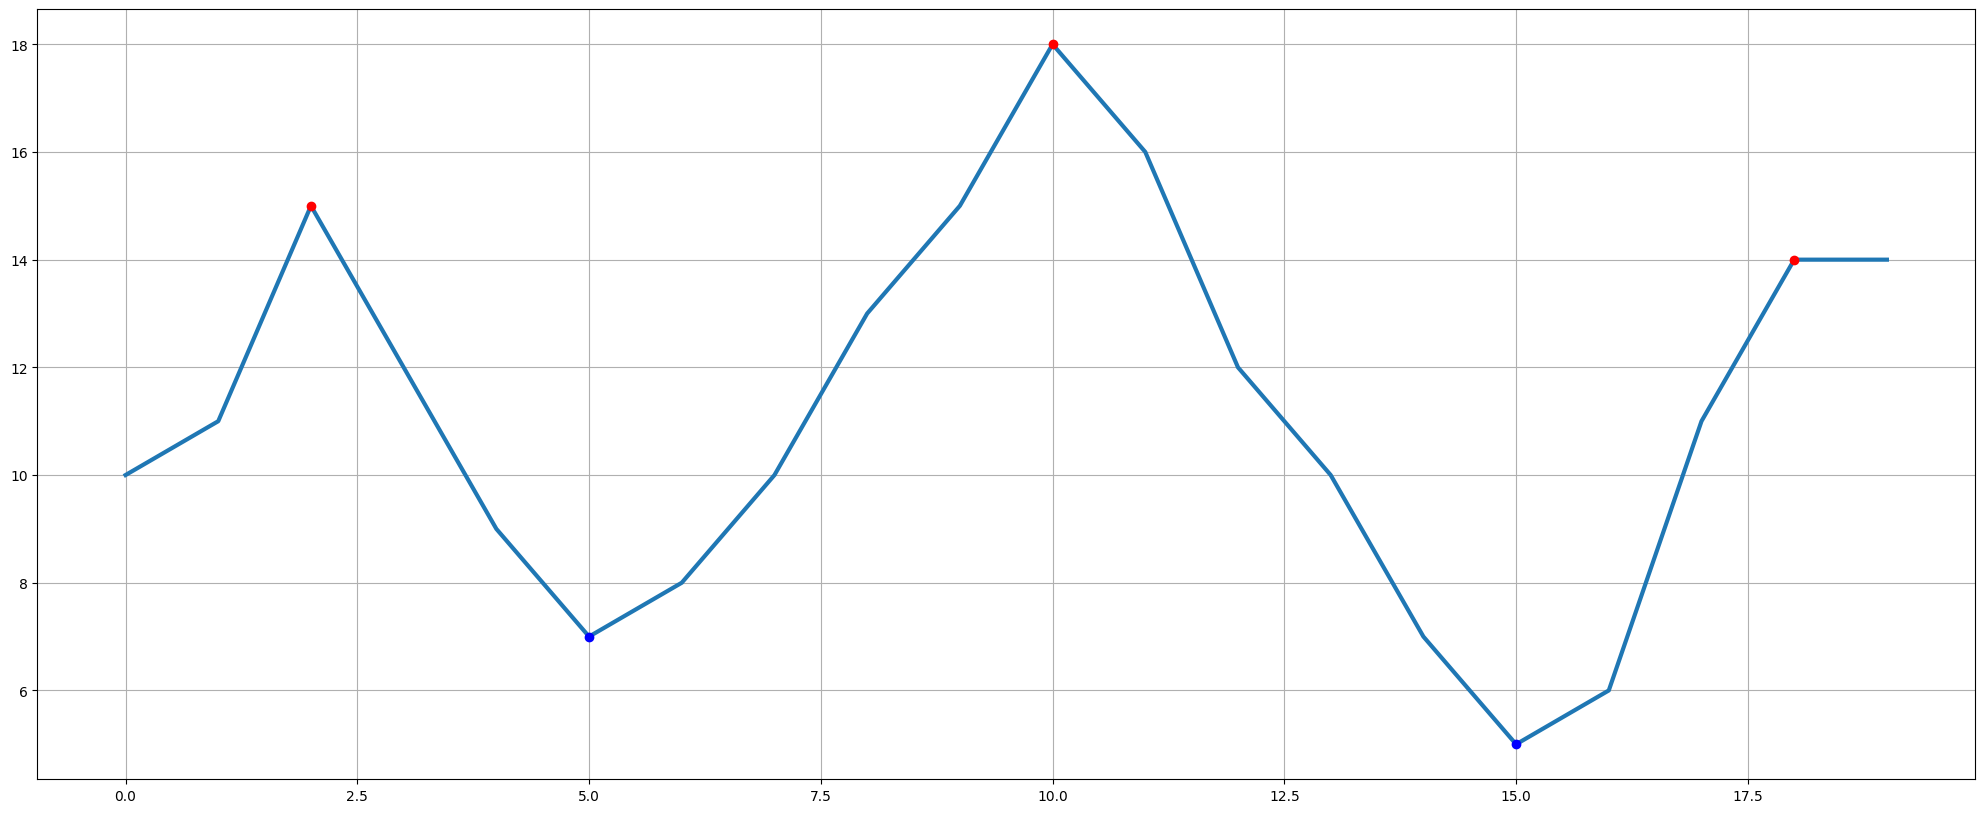

In [92]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [93]:
date_time_str,days,interval

('16/04/24 07:00:00', 15, 12)

## last records

In [94]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
10995,22.96,22.096667
10996,25.44,22.180417
10997,27.49,22.351667
10998,28.99,22.620000
10999,29.77,22.940000
...,...,...
11158,15.22,18.111250
11159,15.85,18.062083
11160,15.51,18.051667
11161,16.32,18.027083


# temperature, moyenne, variation

<Axes: >

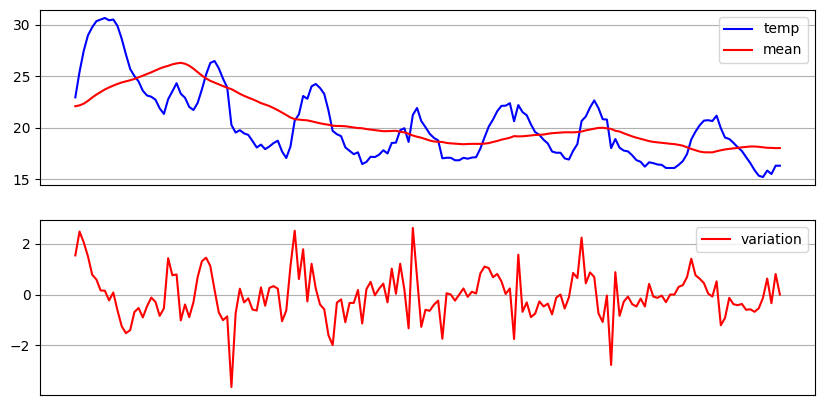

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [96]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(np.float64(30.670000000000016), np.float64(15.220000000000027))

In [97]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [98]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 35.79 19.23 16.56
J -28 26.81 19.93 6.88
J -27 27.41 18.71 8.7
J -26 30.59 18.33 12.26
J -25 30.35 20.02 10.33
J -24 35.32 22.22 13.1
J -23 38.54 21.16 17.38
J -22 32.52 16.07 16.45
J -21 25.59 13.44 12.15
J -20 27.23 14.62 12.61
J -19 27.11 13.67 13.44
J -18 20.24 14.54 5.7
J -17 19.53 12.9 6.63
J -16 22.24 11.25 10.99
J -15 25.36 14.21 11.15
J -14 28.09 16.99 11.1
J -13 29.07 17.39 11.68
J -12 28.25 16.45 11.8
J -11 31.37 20.16 11.21
J -10 27.83 17.69 10.14
J -9 24.22 18.92 5.3
J -8 21.75 14.69 7.06
J -7 26.61 18.33 8.28
J -6 30.67 21.35 9.32
J -5 26.49 17.93 8.56
J -4 24.26 16.48 7.78
J -3 21.93 16.85 5.08
J -2 22.39 16.92 5.47
J -1 22.66 16.1 6.56
J 0 21.18 15.22 5.96


<Axes: >

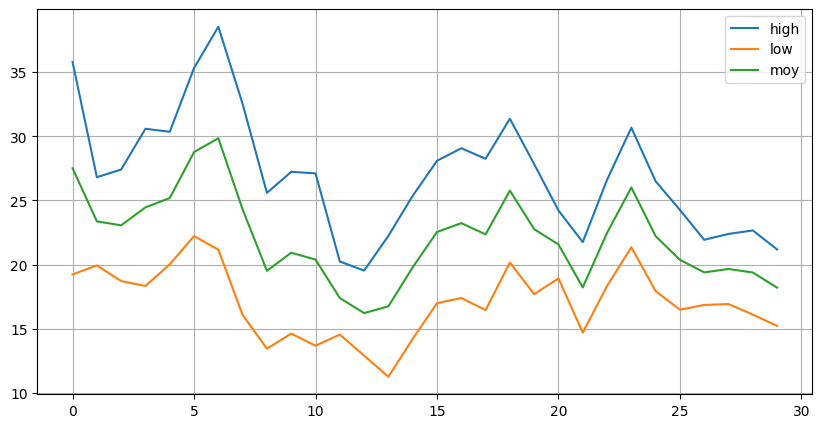

In [99]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [100]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[35.79, 30.59, 38.54, 27.23, 29.07, 31.37, 30.67, 22.66]

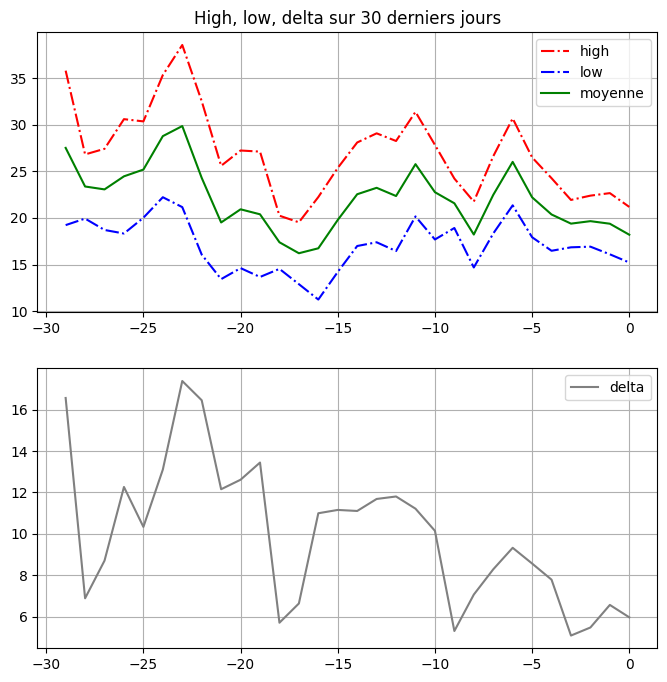

In [101]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       11163 non-null  float64
 1   hours      11163 non-null  float64
 2   dates      11163 non-null  object 
 3   variation  11162 non-null  float64
 4   heures     11163 non-null  object 
 5   jours      11163 non-null  object 
dtypes: float64(3), object(3)
memory usage: 523.4+ KB


In [103]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [104]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [105]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

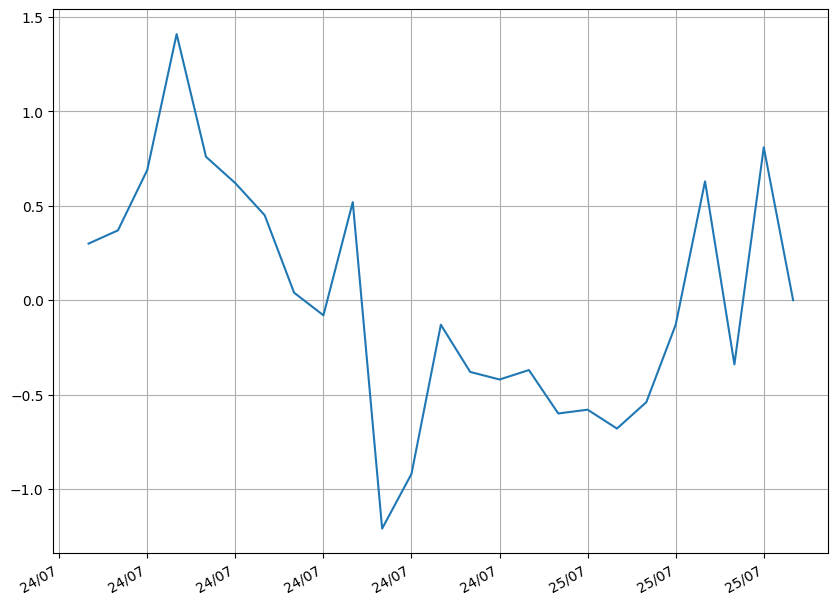

In [106]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [107]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, np.float64(31.370000000000005), np.float64(14.689999999999998))

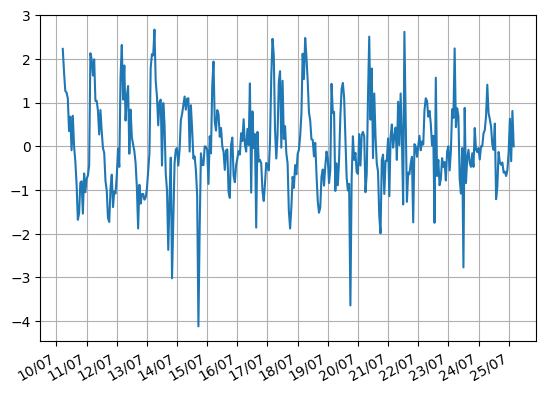

In [108]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [109]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(np.float64(31.370000000000005),
 10884    13/07/25 19:00:00
 Name: dates, dtype: object)

In [110]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(np.float64(14.689999999999998),
 2664     05/08/24 07:00:00
 3894     25/09/24 13:00:00
 10967    17/07/25 06:00:00
 Name: dates, dtype: object)

In [111]:
data.tail(w)['temp'].describe()

count    360.000000
mean      21.533778
std        3.896280
min       14.690000
25%       18.527500
50%       20.775000
75%       24.145000
max       31.370000
Name: temp, dtype: float64

In [112]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('25/07/25 09:56:03', np.float64(16.32))

In [113]:
# current date and time
ts = datetime.timestamp(today)
ts

1753430163.570768